`2019-09-07` `Tiago Ferreira Leao` **v1.0**

# Cyanobiome master dataframe

```
Requirements: packages below
              Installing CheckM
              Assembled genomes (from metagenomes)(run processing_genome_assembly)
```

**Loading packages**

In [1]:
import pandas as pd
import glob
import os
from Bio import SeqIO
from Bio.SeqUtils import GC
import numpy as np
import re
import subprocess
import seaborn as sns

ModuleNotFoundError: No module named 'Bio'

**Running CheckM in bash**

```
checkm taxonomy_wf phylum Cyanobacteria -x fasta /home/gerwick-lab/Desktop/data/genomes/drafts/kappahyperplus/scaffolded_drafts/ /home/tiago/Desktop/cyanet/checkm/ >> /home/tiago/Desktop/cyanet/checkm/cyanobiome_checkm-TFL181108.tsv
```

**Loading CheckM dataframe for scaffolded genomes**

In [2]:
genome_loci = '/home/tiago/Desktop/cyanet/tables/genomic_loci_4-TFL190105.txt'
scaffolds_path = "/home/gerwick-lab/Desktop/data/genomes/drafts/kappahyperplus/scaffolded_drafts/"
checkm_file = "/home/tiago/Desktop/cyanet/checkm/cyanobiome_checkm-TFL181108.tsv"

In [3]:
def get_checkm_data(filename):
    headers=['bin_id','marker_lineage','marker_number','genomes','markers','marker_sets','0','1','2','3','4','5+','completeness','contamination','strain_heterogeneity']
    df = pd.read_csv(filename, delimiter=r'\s+',names=headers,skiprows=3)
    df = df.drop(df.index[len(df)-1])
    return df

checkm_df1 = get_checkm_data(checkm_file)
checkm_dict = pd.Series(checkm_df1["completeness"].values,index=checkm_df1["bin_id"]).to_dict()

In [4]:
checkm_df1.shape

(161, 15)

In [5]:
checkm_df1[checkm_df1.completeness >= 90]

,bin_id,marker_lineage,marker_number,genomes,markers,marker_sets,0,1,2,3,4,5+,completeness,contamination,strain_heterogeneity
0,3C6,Cyanobacteria,(1),129,472,368,0,380,89,3,0,0,100.00,18.57,8.16
1,2I9,Cyanobacteria,(1),129,472,368,0,0,411,52,6,3,100.00,114.24,46.24
2,2I6,Cyanobacteria,(1),129,472,368,0,4,220,179,57,12,100.00,166.73,4.86
3,2H1,Cyanobacteria,(1),129,472,368,0,3,117,299,47,6,100.00,185.79,4.72
4,2G7,Cyanobacteria,(1),129,472,368,0,58,259,112,35,8,100.00,129.75,6.37
5,2G5,Cyanobacteria,(1),129,472,368,0,340,129,3,0,0,100.00,29.07,2.90
6,2G4,Cyanobacteria,(1),129,472,368,0,457,15,0,0,0,100.00,3.68,13.33
7,2F5,Cyanobacteria,(1),129,472,368,0,443,27,2,0,0,100.00,6.58,12.12
8,2C2,Cyanobacteria,(1),129,472,368,0,424,45,3,0,0,100.00,9.25,1.85
9,2B6,Cyanobacteria,(1),129,472,368,0,62,369,40,1,0,100.00,95.91,5.25


**Adding genomic IDs**

In [6]:
summary_df = pd.read_csv(genome_loci, sep='\t')
count = 0
checkm_col = []


for i,r in summary_df.iterrows():
    if len(summary_df.genomeID.loc[i]) < 3:
        summary_df.genomeID.loc[i] = "1%s"%summary_df.genomeID.loc[i]
    if summary_df.genomeID.loc[i] in checkm_dict.keys():
        count += 1
        checkm_col.append(checkm_dict[summary_df.genomeID.loc[i]])
    else:
        checkm_col.append("NA")

summary_df["completeness"] = checkm_col

summary_df = summary_df.replace("NA",0) #zero completeness means the genome did not get scaffold

summary_df[:5]

,collectionID,genomeID,completeness
0,3LMooreaBCUL,4B7,99.46
1,3LOscillatoriaCUL,4B8,99.18
2,ASF14JUL141CUL(1a-algae),4B3,0.00
3,ASG15JUL146CUL,3F2,99.09
4,ASI16JUL142CUL,1E3,98.91


In [7]:
len(checkm_df1),len(summary_df)

(161, 265)

In [8]:
summary_df[summary_df.completeness >= 90].shape

(96, 3)

**Renaming and copy scaffolded genomes with high quality**

In [ ]:
!mkdir /home/tiago/Desktop/cyanet/cyanobiome/scaffolds/

In [ ]:
def rename_scaffolds(fasta_file,outpath):
    strain = os.path.basename(fasta_file).split(".")[0]
    new_file = []
    input_handle = open(fasta_file, "rU")
    node_count = 1
    for record in SeqIO.parse(input_handle, "fasta"):
        new_id = "%s_NODE_%s"%(strain,node_count)
        record.id = str(new_id)
        record.description = ""
        new_file.append(record)
        node_count += 1
    output_handle = open("%s/%s.fasta"%(outpath,strain), "w")
    SeqIO.write(new_file, output_handle, "fasta")
    output_handle.close()
    input_handle.close()
    print "%s contigs renamed"%(node_count-1)

scf_list = list(summary_df[summary_df.completeness >= 90]["genomeID"])    
##removing previously published and re-sequenced genomes
scf_list.remove("4C7") 
scf_list.remove("4B8")
scf_list.remove("4C8")
scf_list.remove("3F3")
scf_list.remove("4B7")
scf_list.remove("1E3")

##removing highly fragmened genomes
scf_list.remove("2D8")
scf_list.remove("1B8")
scf_list.remove("1C1")
scf_list.remove("3F1")
scf_list.remove("1C9")
scf_list.remove("4B2")
scf_list.remove("4A8")

##removing genomes with more than one cyanobacteria
scf_list.remove("2I9")
scf_list.remove("2H1")
scf_list.remove("2I6")
scf_list.remove("1D4")
scf_list.remove("1I4")

##removing duplicated genomes (cyanobacteria was cultured)
scf_list.remove("1B6")
scf_list.remove("1A2")
scf_list.remove("2A9")
scf_list.remove("2G8")
scf_list.remove("3A1")


for item in scf_list:
    scaffold = "/home/gerwick-lab/Desktop/data/genomes/drafts/kappahyperplus/scaffolded_drafts/%s.fasta"%item
    rename_scaffolds(scaffold,"/home/tiago/Desktop/cyanet/cyanobiome/scaffolds/")

**Removing duplicates from missing list**

In [9]:
missing_df = summary_df[summary_df.completeness == 0]

len(missing_df)

105

In [10]:
index_out = []

for i,r in missing_df.iterrows():
    genomeID = missing_df.genomeID.loc[i]
    scaffolded_genome = glob.glob("/home/gerwick-lab/Desktop/data/genomes/drafts/kappahyperplus/scaffolded_drafts/%s*fasta"%genomeID)
    if scaffolded_genome:
        print scaffolded_genome[0]
        index_out.append(i)
        
missing_df = missing_df.drop(index_out)

len(missing_df)

/home/gerwick-lab/Desktop/data/genomes/drafts/kappahyperplus/scaffolded_drafts/4D7.fasta
/home/gerwick-lab/Desktop/data/genomes/drafts/kappahyperplus/scaffolded_drafts/4B1.fasta
/home/gerwick-lab/Desktop/data/genomes/drafts/kappahyperplus/scaffolded_drafts/4A6.fasta
/home/gerwick-lab/Desktop/data/genomes/drafts/kappahyperplus/scaffolded_drafts/4E4.fasta


101

**PS: these 4 genomes will be included in the next CheckM run**

**Making darkhorse list**

In [ ]:
smry_list = glob.glob("/home/gerwick-lab/Desktop/data/genomes/prokka/darkhorse/*/*_smry")
smry_dict = {}

for item in smry_list:
    logfile = os.path.join(os.path.dirname(item),os.path.basename(item).split("_")[0]+"_logfile")
    f=open(logfile)
    lines=f.readlines()
    m = re.search(r'(\S*).matches.m8',lines[4])
    if m:
        smry_dict[m.group(1)] = item
        
len(smry_dict)

**Binning metagenomic contigs**

In [ ]:
def loading_darkhorse_taxa_dict(smry_file):
    darkhorse_df = pd.read_csv(smry_file, sep='\t')
    taxa_dict = {}
    for i,r in darkhorse_df.iterrows():
        taxa_class = str(darkhorse_df.lineage.loc[i].split(";",2)[1]).split(" ",1)[0]
        taxa_dict[darkhorse_df.query_id.loc[i]] = taxa_class
    return taxa_dict

def loading_prokka_to_contig_mapping(filename):
    prokka_id_to_contig_mapping = {}
    contig_id = ""
    for line in open(filename):
        if line.find(">Feature") != -1:
            contig_id = line.rstrip().split(" ")[1]
            continue
        if line.find("locus_tag") != -1:
            prokka_id = line.lstrip().rstrip().split("\t")[-1]
            prokka_id_to_contig_mapping[prokka_id] = contig_id
    return prokka_id_to_contig_mapping
            
def get_contig_list(smry_file,tbl_file):
    contig_dict = loading_prokka_to_contig_mapping(tbl_file)
    taxa_dict = loading_darkhorse_taxa_dict(smry_file)
    merged_dict = {}
    for key in contig_dict.iterkeys():
        if contig_dict[key] not in merged_dict:
            if key in taxa_dict:
                merged_dict[contig_dict[key]] = taxa_dict[key]
        else:
            if key in taxa_dict:
                merged_dict[contig_dict[key]] = merged_dict[contig_dict[key]] +", "+ taxa_dict[key]
    contig_list = []
    for key,value in merged_dict.items():
        if "Cyanobacteria" in value:
            contig_list.append(key)
    return contig_list

def save_binned_fasta(smry_file,tbl_file,input_fasta,output_fasta):
    contig_list = get_contig_list(smry_file,tbl_file)
    new_file = []
    input_handle = open(input_fasta, "rU")
    count = 1
    for record in SeqIO.parse(input_handle, "fasta"):
        if record.id in contig_list:
            new_file.append(record)
            count += 1
    output_handle = open(output_fasta, "w")
    SeqIO.write(new_file, output_handle, "fasta")
    output_handle.close()
    input_handle.close()
    print "%s records processed and saved into %s"%(count,output_fasta)

In [ ]:
###copying the hybrid assembly (ASI-nathan notebook) for ASI
# !cp /home/tiago/Desktop/cyanet/asi-nathan/ASIH.ren.fasta /home/gerwick-lab/Desktop/data/genomes/drafts/kappahyperplus/metagenomes/renamed/ASIH.fasta

In [11]:
!ls /home/gerwick-lab/Desktop/data/genomes/drafts/kappahyperplus/metagenomes/renamed/ASIH.fasta

/home/gerwick-lab/Desktop/data/genomes/drafts/kappahyperplus/metagenomes/renamed/ASIH.fasta


In [12]:
#adding ASIH to missing_df

df_ASIH = pd.DataFrame(columns=['collectionID', 'genomeID', 'completeness'])

df_ASIH.loc[0] = ["ASI16JUL142CUL","ASIH",0]

missing_df = missing_df.append(df_ASIH,ignore_index=True)

missing_df[missing_df.genomeID == "ASIH"]

,collectionID,genomeID,completeness
101,ASI16JUL142CUL,ASIH,0


In [ ]:
!mkdir /home/tiago/Desktop/cyanet/cyanobiome/meta_binned/

In [ ]:
output_folder = "/home/tiago/Desktop/cyanet/cyanobiome/meta_binned/"
no_sequence = []

for i,r in missing_df.iterrows():
    genomeID = missing_df.genomeID.loc[i]
    metagen_file = glob.glob("/home/gerwick-lab/Desktop/data/genomes/drafts/kappahyperplus/metagenomes/renamed/%s*fasta"%genomeID)
    if metagen_file:
        if genomeID in smry_dict:
            tbl_file = glob.glob("/home/gerwick-lab/Desktop/data/genomes/prokka/annotation/%s/%s.tbl"%(genomeID,genomeID))
            if len(tbl_file) == 0:
                tbl_file = glob.glob("/home/gerwick-lab/Desktop/data/genomes/prokka/annotation/%s/%s.tbl"%(genomeID[1:3],genomeID[1:3]))
            smry_file = smry_dict[genomeID]
            output_fasta = output_folder + "%s.fasta"%genomeID
            save_binned_fasta(smry_file,tbl_file[0],metagen_file[0],output_fasta)
    else:
        no_sequence.append(genomeID)

In [ ]:
len(no_sequence)

In [ ]:
!ls /home/tiago/Desktop/cyanet/cyanobiome/meta_binned/*fasta

**Adding missing genomes to folder**

In [ ]:
!cp /home/gerwick-lab/Desktop/data/genomes/drafts/kappahyperplus/scaffolded_drafts/4D7.fasta /home/tiago/Desktop/cyanet/cyanobiome/meta_binned/
!cp /home/gerwick-lab/Desktop/data/genomes/drafts/kappahyperplus/scaffolded_drafts/4B1.fasta /home/tiago/Desktop/cyanet/cyanobiome/meta_binned/
!cp /home/gerwick-lab/Desktop/data/genomes/drafts/kappahyperplus/scaffolded_drafts/4A6.fasta /home/tiago/Desktop/cyanet/cyanobiome/meta_binned/
!cp /home/gerwick-lab/Desktop/data/genomes/drafts/kappahyperplus/scaffolded_drafts/4E4.fasta /home/tiago/Desktop/cyanet/cyanobiome/meta_binned/
!cp /home/gerwick-lab/Desktop/data/genomes/complete/ISB-B.fasta /home/tiago/Desktop/cyanet/cyanobiome/meta_binned/

In [ ]:
!ls /home/tiago/Desktop/cyanet/cyanobiome/meta_binned/*fasta | wc -l

**Running second CheckM on binned metagenomes**

In [ ]:
!mkdir /home/tiago/Desktop/cyanet/cyanobiome/tables

```
checkm taxonomy_wf phylum Cyanobacteria -x fasta \
/home/tiago/Desktop/cyanet/cyanobiome/meta_binned/ \
/home/tiago/Desktop/cyanet/cyanobiome/tables/ >> \
/home/tiago/Desktop/cyanet/cyanobiome/tables/checkM_metabinned_TFL190315
```

In [13]:
def get_checkm_data(filename):
    headers=['bin_id','marker_lineage','marker_number','genomes','markers','marker_sets','0','1','2','3','4','5+','completeness','contamination','strain_heterogeneity']
    df = pd.read_csv(filename, delimiter=r'\s+',names=headers,skiprows=3)
    df = df.drop(df.index[len(df)-1])
    return df

checkm_df2 = get_checkm_data("/home/tiago/Desktop/cyanet/cyanobiome/tables/checkM_metabinned_TFL190315")
checkm_dict2 = pd.Series(checkm_df2["completeness"].values,index=checkm_df2["bin_id"]).to_dict()

merged_checkm = checkm_dict.copy()
merged_checkm.update(checkm_dict2)

In [14]:
len(checkm_dict),len(checkm_dict2),len(merged_checkm)

(161, 37, 198)

In [15]:
checkm_df2

,bin_id,marker_lineage,marker_number,genomes,markers,marker_sets,0,1,2,3,4,5+,completeness,contamination,strain_heterogeneity
0,4A6,Cyanobacteria,(1),129.0,472.0,368.0,0.0,3.0,418.0,45.0,6.0,0.0,100.00,110.43,3.06
1,ASIH,Cyanobacteria,(1),129.0,472.0,368.0,4.0,432.0,30.0,6.0,0.0,0.0,98.91,6.68,4.17
2,ISB-B,Cyanobacteria,(1),129.0,472.0,368.0,5.0,460.0,6.0,0.0,1.0,0.0,98.82,1.77,0.00
3,4B3,Cyanobacteria,(1),129.0,472.0,368.0,91.0,74.0,165.0,87.0,39.0,16.0,76.45,96.45,0.89
4,3F8,Cyanobacteria,(1),129.0,472.0,368.0,111.0,148.0,128.0,43.0,29.0,13.0,71.60,75.91,2.54
5,2B5,Cyanobacteria,(1),129.0,472.0,368.0,169.0,275.0,26.0,1.0,1.0,0.0,58.15,5.41,25.71
6,2E1,Cyanobacteria,(1),129.0,472.0,368.0,281.0,161.0,30.0,0.0,0.0,0.0,35.15,2.92,0.00
7,3A9,Cyanobacteria,(1),129.0,472.0,368.0,337.0,106.0,24.0,5.0,0.0,0.0,26.81,5.48,5.13
8,4E6,Cyanobacteria,(1),129.0,472.0,368.0,412.0,60.0,0.0,0.0,0.0,0.0,12.83,0.00,0.00
9,3C9,Cyanobacteria,(1),129.0,472.0,368.0,407.0,65.0,0.0,0.0,0.0,0.0,12.16,0.00,0.00


**Copying high-quality genomes to scaffolds folder**
```
The only two high-quality genomes outside scaffolds folder was ISB-B (single contig manually renamed as ISBB_NODE_1) and ASIH, 4A6 is very complete but also very contaminated
```

In [ ]:
!mv /home/tiago/Desktop/cyanet/cyanobiome/meta_binned/ISB-B.fasta /home/tiago/Desktop/cyanet/cyanobiome/scaffolds/ISBB.fasta
!mv /home/tiago/Desktop/cyanet/cyanobiome/meta_binned/ASIH.fasta /home/tiago/Desktop/cyanet/cyanobiome/scaffolds/ASIH.fasta

**Generating master dataframe**

In [16]:
summary_df = pd.read_csv(genome_loci, sep='\t')
count = 0
checkm_col = []


for i,r in summary_df.iterrows():
    if len(summary_df.genomeID.loc[i]) < 3:
        summary_df.genomeID.loc[i] = "1%s"%summary_df.genomeID.loc[i]
    if summary_df.genomeID.loc[i] in merged_checkm.keys():
        count += 1
        checkm_col.append(merged_checkm[summary_df.genomeID.loc[i]])
    else:
        checkm_col.append("NA")

summary_df["completeness"] = checkm_col

summary_df = summary_df.replace("NA",0) #zero completeness means the genome did not get scaffolded

summary_df[:5]

,collectionID,genomeID,completeness
0,3LMooreaBCUL,4B7,99.46
1,3LOscillatoriaCUL,4B8,99.18
2,ASF14JUL141CUL(1a-algae),4B3,76.45
3,ASG15JUL146CUL,3F2,99.09
4,ASI16JUL142CUL,1E3,98.91


/home/tiago/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


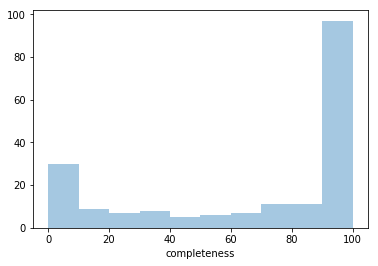

In [17]:
summary_plot = summary_df[summary_df.completeness != 0]

sns.distplot( summary_plot["completeness"], bins=10,kde=False)

In [18]:
master_df = summary_df[summary_df.completeness >= 90]

master_df = master_df[~master_df['genomeID'].isin(["4C7","4B8","4C8","3F3","4B7","1E3","2D8","1B8","1C1","3F1","1C9","4B2","4A8","2I9","2H1","2I6","1D4"])]

master_df.shape

(80, 3)

In [19]:
#adding ISBB and ASIH to master_df

df_ISBB = pd.DataFrame(columns=['collectionID', 'genomeID', 'completeness'])

df_ISBB.loc[0] = ["ISB3NOV948BCUL","ISBB",100]

df_ASIH = pd.DataFrame(columns=['collectionID', 'genomeID', 'completeness'])

df_ASIH.loc[0] = ["ASI16JUL142CUL","ASIH",0]

master_df = master_df.append(df_ISBB,ignore_index=True)

master_df = master_df.append(df_ASIH,ignore_index=True)

master_df = master_df[~master_df['genomeID'].isin(["4A6"])]

master_df.shape

(81, 3)

**Confirming match between master_df and genomes in scaffold folder**

In [21]:
ls /home/tiago/Desktop/cyanet/cyanobiome/scaffolds/ | wc -l

81


In [22]:
for item in master_df["genomeID"]:
    glob_file = glob.glob("/home/tiago/Desktop/cyanet/cyanobiome/scaffolds/%s.fasta"%item)
    if not glob_file:
        print item

**Expanding master_df with counts**

```
First, process the biosynthetic gene clusters using the big-scape notebook!
```

In [23]:
def get_draft_counts(query_genome):
    input_handle = open(query_genome, "rU")
    node_count = 0
    gc_count = []
    for record in SeqIO.parse(input_handle, "fasta"):
        node_count += 1
        gc_count.append(GC(record.seq))
    gc_average = np.average(gc_count)
    return node_count,gc_average
    input_handle.close()
    
def get_count_cols(summary_df,query_list):
    count1_list = []
    count2_list = []
    for i,r in summary_df.iterrows():
        temp_list = summary_df.genomeID.loc[i].split("-")
        for item in temp_list:
            paths = [s for s in query_list if item in s]
        if len(paths) > 0:
            size_list = []
            gc_list = []
            for fasta in paths:
                node_count,gc_count = get_draft_counts(fasta)
                size_list.append(node_count)
                gc_list.append(gc_count)
            minpos = size_list.index(min(size_list))
            count1_list.append(min(size_list))
            count2_list.append(round(gc_list[minpos],2))
        else:
            count1_list.append("NA")
            count2_list.append("NA")
    return count1_list,count2_list

def get_bgc_cols(summary_df,query_list):
    count1_list = []
    count2_list = []
    for i,r in summary_df.iterrows():
        temp_list = summary_df.genomeID.loc[i].split("-")
        for item in temp_list:
            paths = [s for s in query_list if item in s]
        if len(paths) > 0:
            for filename in paths:
                code = os.path.basename(filename).split(".")[0]
                if len(code) < 3:
                    code = "1%s"%code
                all_bgcs = len(glob.glob("/home/tiago/Desktop/cyanet/bigscape/all_bgcs/%s_*gbk"%code))
                incomp_bgcs = len(glob.glob("/home/tiago/Desktop/cyanet/bigscape/incomplete_inputs/%s_*gbk"%code))
        count1_list.append(all_bgcs)
        count2_list.append(incomp_bgcs)
    return count1_list,count2_list

In [24]:
query_list = glob.glob("/home/tiago/Desktop/cyanet/cyanobiome/scaffolds/*")
count1_col,count2_col = get_count_cols(master_df,query_list)
master_df["#scaffolds"] = count1_col
master_df["GC"] = count2_col
all_count_list, inc_count_list= get_bgc_cols(master_df,query_list)
comp_count_list = []
for i,item in enumerate(all_count_list):
    new_item = item - inc_count_list[i]
    comp_count_list.append(new_item)
master_df["#fragBGCs"] = inc_count_list
master_df["#completeBGCs"] = comp_count_list
master_df["#allBGCs"] = all_count_list

In [25]:
master_df = master_df.reset_index(inplace=False,drop=True)

In [26]:
master_df

,collectionID,genomeID,completeness,#scaffolds,GC,#fragBGCs,#completeBGCs,#allBGCs
0,ASG15JUL146CUL,3F2,99.09,1606,58.04,10,0,10
1,ASX22JUL142CUL,1E4,99.73,2557,55.18,12,18,30
2,CobbledownCUL,4C1,99.18,1299,56.61,21,4,25
3,numC11CUL,4C4,94.38,3601,54.79,4,2,6
4,numC15BCUL,4C5,98.64,1877,56.32,15,0,15
5,PAB16MAY116CUL,3F4,98.91,2691,52.85,9,0,9
6,PAB18MAY119CUL,1E1,99.18,2004,50.19,23,1,24
7,PAL23MAY131CUL,1I2,98.51,1422,51.47,10,4,14
8,PAL24MAY135-contACUL,1I4,99.46,2228,62.72,11,0,11
9,PAP25JUN122CUL,1D8,97.09,3292,54.75,9,0,9


**Correcting ISBB and ASIH number of BGCs**

Since ISBB was in a separate folder, the total BGCs counted as zero when it is indeed 11 complete BGCs

In [27]:
master_df[master_df.genomeID == "ISBB"]

,collectionID,genomeID,completeness,#scaffolds,GC,#fragBGCs,#completeBGCs,#allBGCs
79,ISB3NOV948BCUL,ISBB,100,2,52.1,0,0,0


In [28]:
master_df[master_df.genomeID == "ASIH"]

,collectionID,genomeID,completeness,#scaffolds,GC,#fragBGCs,#completeBGCs,#allBGCs
80,ASI16JUL142CUL,ASIH,0,674,49.6,0,0,0


In [29]:
master_df.at[79,'#completeBGCs'] = 11
master_df.at[79,'#allBGCs'] = 11

master_df[master_df.genomeID == "ISBB"]

,collectionID,genomeID,completeness,#scaffolds,GC,#fragBGCs,#completeBGCs,#allBGCs
79,ISB3NOV948BCUL,ISBB,100,2,52.1,0,11,11


In [30]:
master_df.at[80,'#completeBGCs'] = 41
master_df.at[80,'#allBGCs'] = 46
master_df.at[80,'#fragBGCs'] = 5
master_df.at[80,'completeness'] = 98.91

master_df[master_df.genomeID == "ASIH"]

,collectionID,genomeID,completeness,#scaffolds,GC,#fragBGCs,#completeBGCs,#allBGCs
80,ASI16JUL142CUL,ASIH,98.91,674,49.6,5,41,46


**Finding GC cutoff using high GC genomes**

In [ ]:
df_gc = master_df[master_df["GC"] >= 55]

print len(df_gc)

df_gc

In [ ]:
!mkdir -p /home/tiago/Desktop/cyanet/cyanobiome/quast/

if not os.path.exists("/home/tiago/Desktop/cyanet/cyanobiome/quast/4B7.fasta"):
    for i,r in df_gc.iterrows():
        subprocess.call("cp /home/tiago/Desktop/cyanet/cyanobiome/scaffolds/%s.fasta /home/tiago/Desktop/cyanet/cyanobiome/quast/"%df_gc.genomeID.loc[i],shell=True)

In [ ]:
!ls /home/tiago/Desktop/cyanet/cyanobiome/quast/

In [ ]:
if not os.path.exists("/home/tiago/Desktop/cyanet/cyanobiome/quast/report.pdf"):
    !/home/tiago/quast-5.0.0/quast.py /home/tiago/Desktop/cyanet/cyanobiome/quast/*.fasta -o /home/tiago/Desktop/cyanet/cyanobiome/quast/

```
According to the report above, the maximum GC should be set for 58%
```

In [32]:
!mkdir /home/tiago/Desktop/cyanet/cyanobiome/final_scaffolds/

```
First, filter all scaffolds with 1kb to obtain scaffolds size, then proceed below

ls -lh /home/tiago/Desktop/cyanet/cyanobiome/final_scaffolds/ > /home/tiago/Desktop/cyanet/cyanobiome/1kb_scf_sizes.txt
```

In [33]:
size_df = pd.read_csv('/home/tiago/Desktop/cyanet/cyanobiome/1kb_scf_sizes.txt',sep=',',header=None)
size_dict = pd.Series(size_df[1].values,index=size_df[0]).to_dict()

size_dict

{'1A2': 11.0,
 '1A3': 13.0,
 '1A7': 8.9,
 '1B1': 11.0,
 '1B6': 7.7,
 '1C2': 8.5,
 '1C4': 7.2,
 '1D4': 13.0,
 '1D8': 7.6,
 '1D9': 6.0,
 '1E1': 11.0,
 '1E4': 8.6,
 '1F2': 7.0,
 '1F9': 8.1,
 '1G1': 5.1,
 '1G2': 5.5,
 '1G6': 8.1,
 '1H2': 8.2,
 '1H4': 8.1,
 '1H5': 8.3,
 '1H6': 17.0,
 '1I2': 5.7,
 '1I4': 6.2,
 '1I7': 9.2,
 '2A8': 7.3,
 '2A9': 6.7,
 '2B3': 9.8,
 '2B6': 12.0,
 '2B7': 14.0,
 '2B9': 7.5,
 '2C1': 8.0,
 '2C2': 8.7,
 '2C4': 7.7,
 '2C9': 11.0,
 '2D1': 11.0,
 '2D2': 12.0,
 '2E6': 8.8,
 '2E9': 7.6,
 '2F4': 9.9,
 '2F5': 8.2,
 '2G3': 11.0,
 '2G4': 8.2,
 '2G5': 8.6,
 '2G6': 6.9,
 '2G7': 13.0,
 '2G8': 9.0,
 '2H1': 20.0,
 '2H7': 9.4,
 '2I5': 11.0,
 '2I6': 18.0,
 '2I9': 20.0,
 '3A1': 12.0,
 '3A2': 8.2,
 '3A5': 8.1,
 '3B2': 9.0,
 '3B3': 11.0,
 '3B5': 12.0,
 '3C2': 8.4,
 '3C4': 8.9,
 '3C6': 7.3,
 '3E2': 6.1,
 '3E6': 8.8,
 '3E8': 8.3,
 '3F2': 7.1,
 '3F4': 7.9,
 '3F7': 8.3,
 '3G5': 9.0,
 '3H1': 8.5,
 '3H5': 8.2,
 '3I5': 11.0,
 '3I6': 11.0,
 '3I7': 9.8,
 '3I8': 7.8,
 '4A1': 8.9,
 '4A3': 14.0,
 '

In [34]:
threekb_list = []

for key in size_dict:
    if size_dict[key] > 11:
        threekb_list.append(key)
        
threekb_list

['1A3',
 '1H6',
 '2H1',
 '1D4',
 '4A3',
 '2G7',
 '2D2',
 '2B7',
 '2B6',
 '3B5',
 '4A5',
 '3A1',
 '2I9',
 '2I6']

In [35]:
def select_scaffolds(fasta_file,strain,outfile,cutoff,threekb_list):
    strain = os.path.basename(fasta_file).split(".")[0]
    if strain in threekb_list:
        size_cutoff = 3000
    else:
        size_cutoff = 1000
    new_file = []
    gc_count = []
    input_handle = open(fasta_file, "rU")
    node_count = 1
    for record in SeqIO.parse(input_handle, "fasta"):
        if len(record) >= size_cutoff:
            if GC(record.seq) < cutoff:
                new_id = "%s_NODE_%s"%(strain,node_count)
                record.id = str(new_id)
                record.description = ""
                new_file.append(record)
                node_count += 1
                gc_count.append(GC(record.seq))
    output_handle = open(outfile, "w")
    SeqIO.write(new_file, output_handle, "fasta")
    output_handle.close()
    input_handle.close()
    print "%s contigs renamed"%(node_count)
    gc_average = np.average(gc_count)
    return node_count,round(gc_average,2)

new_size_col = []
new_gc_col = []

for strain in list(master_df.genomeID):
    fasta_file = glob.glob("/home/tiago/Desktop/cyanet/cyanobiome/scaffolds/%s.fasta"%strain)[0]
    strain = "SIO"+strain
    outfile = "/home/tiago/Desktop/cyanet/cyanobiome/final_scaffolds/%s.fasta"%(strain)
    size,gc_perc = select_scaffolds(fasta_file,strain,outfile,58,threekb_list)
    new_size_col.append(size)
    new_gc_col.append(gc_perc)

454 contigs renamed
659 contigs renamed
849 contigs renamed
1496 contigs renamed
1204 contigs renamed
1509 contigs renamed
1398 contigs renamed
1046 contigs renamed
245 contigs renamed
1787 contigs renamed
332 contigs renamed
399 contigs renamed
1462 contigs renamed
265 contigs renamed
1267 contigs renamed
2584 contigs renamed
1374 contigs renamed
183 contigs renamed
688 contigs renamed
246 contigs renamed
3478 contigs renamed
777 contigs renamed
110 contigs renamed
164 contigs renamed
279 contigs renamed
192 contigs renamed
263 contigs renamed
1436 contigs renamed
3058 contigs renamed
1655 contigs renamed
2028 contigs renamed
1833 contigs renamed
471 contigs renamed
250 contigs renamed
687 contigs renamed
3347 contigs renamed
184 contigs renamed
1595 contigs renamed
1186 contigs renamed
1513 contigs renamed
318 contigs renamed
5156 contigs renamed
339 contigs renamed
3628 contigs renamed
334 contigs renamed
3842 contigs renamed
590 contigs renamed
1149 contigs renamed
1348 contigs ren

**Updating node count in master_df**

In [36]:
master_df["#scaffolds"] = new_size_col
master_df["GC"] = new_gc_col

master_df[:5]

,collectionID,genomeID,completeness,#scaffolds,GC,#fragBGCs,#completeBGCs,#allBGCs
0,ASG15JUL146CUL,3F2,99.09,454,49.40,10,0,10
1,ASX22JUL142CUL,1E4,99.73,659,52.29,12,18,30
2,CobbledownCUL,4C1,99.18,849,53.63,21,4,25
3,numC11CUL,4C4,94.38,1496,46.66,4,2,6
4,numC15BCUL,4C5,98.64,1204,52.29,15,0,15


In [37]:
new_names = []

for i,r in master_df.iterrows():
    strain = "SIO" + str(master_df.genomeID.loc[i])
    new_names.append(strain)
    
master_df["genomeID"] = new_names

master_df[:5]

,collectionID,genomeID,completeness,#scaffolds,GC,#fragBGCs,#completeBGCs,#allBGCs
0,ASG15JUL146CUL,SIO3F2,99.09,454,49.40,10,0,10
1,ASX22JUL142CUL,SIO1E4,99.73,659,52.29,12,18,30
2,CobbledownCUL,SIO4C1,99.18,849,53.63,21,4,25
3,numC11CUL,SIO4C4,94.38,1496,46.66,4,2,6
4,numC15BCUL,SIO4C5,98.64,1204,52.29,15,0,15


In [38]:
master_df.to_csv("/home/tiago/Desktop/cyanet/cyanobiome/tables/master_df-TFL190425.txt",sep="\t",index_label=False)

In [1]:
!cp /home/tiago/Desktop/cyanet/cyanobiome/tables/master_df-TFL190425.txt /home/tiago/Desktop/cyanet/genomics_pnas/outputs/

In [3]:
!cp -r /home/tiago/Desktop/cyanet/cyanobiome/final_scaffolds/ /home/tiago/Desktop/cyanet/genomics_pnas/outputs/

```
Outputs: master_df-TFL190425.txt
         final scaffolds
```